# Scientific plotting with seaborn

In this tutorial, we will use some of the measurements taken in the course and visualize them nicely using the [seaborn Python library](https://seaborn.pydata.org/). Seaborn comes with the advantage that it interacts very nicely with the DataFrame format from the [Python pandas library](https://pandas.pydata.org/) - a convenient way of handling tabular data in Python.

For more detailed information: You may have been used to using [Matplotlib](https://matplotlib.org/) for plotting in Python. In a way, seaborn is just matplotlib - but it expands the functionality of matplotlib to be easier to use for more complex visualizations.

Let's load all the packages we need here:

In [2]:
import seaborn as sns
import os
import pandas as pd

## Loading the data

As a first step, we need to load the measurements from napari. Alternatively, you can download some from the course repository (TODO: Add link). For this, we need to compile a list of all .csv files we takr into account.

In [3]:
root = r'./measurements'

files = os.listdir(root)
files

['17P1_POS0006_D_1UL_labels.csv',
 '17P1_POS0007_D_1UL_labels.csv',
 '17P1_POS0011_D_1UL_labels.csv',
 '20P1_POS0005_D_1UL_labels.csv',
 '20P1_POS0007_D_1UL_labels.csv',
 '20P1_POS0008_D_1UL_labels.csv',
 '20P1_POS0010_D_1UL_labels.csv',
 'A9_p5d_labels.csv',
 'A9_p7d_labels.csv',
 'A9_p9d_labels.csv']

Next, we load them all into pandas dataframes. For this, we go through the data in a for-loop, load each file and then concatenate all the tabular data into a single table. Let's look into a single dataframe first to see what we are dealing with. The `df.head(5)` command shows us the first 5 rows of the table so that we don't clutter our output with tons of tabular data:

In [4]:
first_file = os.path.join(root, files[0])
df = pd.read_csv(first_file)
df.head(5)

,Unnamed: 0,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min,index
0,0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0,1
1,1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0,2
2,2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0,3
3,3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0,4
4,4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0,5


We notice that there's a bunch of irrelevant stuff. The `index` column is a remnant of the analysis in napari - so let's drop it:

In [5]:
df.drop(columns=['index']).head(5)

,Unnamed: 0,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min
0,0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0
1,1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0
2,2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0
3,3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0
4,4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0


The `Unnamed: 0` column is essentially just the row index of the csv file, which pandas loads by default, but doesn't know where to put it. We can tell pandas to use this column as the index of the row upon import. Let's load everything now! 

*Hint* We may want to distinguish from which dataset which measurement came. To do so, we simply add another column to each dataframe, that indicates from whhich image the respective measurement comes

In [6]:
big_df = pd.DataFrame()

for file in files:
    full_filename = os.path.join(root, file)
    df = pd.read_csv(full_filename, index_col='Unnamed: 0')  #load dataframe
    df = df.drop(columns=['index'])  # drop irrelevant index column
    df['sample'] = file  # add column with sample name

    big_df = pd.concat([big_df, df], axis=0)  # append table to big_df

In [7]:
big_df

,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min,sample
0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0,17P1_POS0006_D_1UL_labels.csv
1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0,17P1_POS0006_D_1UL_labels.csv
2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0,17P1_POS0006_D_1UL_labels.csv
3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0,17P1_POS0006_D_1UL_labels.csv
4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0,17P1_POS0006_D_1UL_labels.csv
...,...,...,...,...,...,...,...,...,...,...,...
102,103,509.0,91.597980,34.431846,19.886244,0.816353,509.0,59.245580,118.0,31.0,A9_p9d_labels.csv
103,104,87.0,41.106602,18.743849,6.228837,0.943169,87.0,72.103448,138.0,25.0,A9_p9d_labels.csv
104,105,129.0,46.727922,20.222045,8.532153,0.906632,129.0,80.813953,126.0,26.0,A9_p9d_labels.csv
105,106,196.0,54.142136,20.214850,12.912128,0.769419,196.0,80.387755,171.0,21.0,A9_p9d_labels.csv


From the data here we can see that there are three different sample types - A9, 17P1 and 20P1. Let's add a column to the dataframe tahat indicates from which type the respective image was taken:

In [8]:
big_df['experiment'] = big_df['sample'].apply(lambda x: x.split('_')[0])
big_df.head()

,label,area_filled,perimeter,axis_major_length,axis_minor_length,eccentricity,area,intensity_mean,intensity_max,intensity_min,sample,experiment
0,1,29.0,18.863961,7.853437,4.935022,0.777898,29.0,58.724138,67.0,49.0,17P1_POS0006_D_1UL_labels.csv,17P1
1,2,32.0,24.242641,12.953143,3.174186,0.969510,32.0,73.343750,118.0,40.0,17P1_POS0006_D_1UL_labels.csv,17P1
2,3,316.0,65.112698,22.947857,17.642785,0.639465,316.0,95.332278,248.0,22.0,17P1_POS0006_D_1UL_labels.csv,17P1
3,4,258.0,60.284271,22.477335,14.716400,0.755870,258.0,113.585271,204.0,19.0,17P1_POS0006_D_1UL_labels.csv,17P1
4,5,59.0,32.278175,15.198125,5.328297,0.936529,59.0,80.881356,162.0,35.0,17P1_POS0006_D_1UL_labels.csv,17P1


## Plotting: Distributions

Now for the actual plotting: Let's try it with a histogram of the nuclei sizes first. The seaborn syntax is very simple: We pass the measurements table `big_df` directly to the plotting function (`sns.histplot`) and tell seaborn which variable to take into account for the histogram.

<Axes: xlabel='area_filled', ylabel='Count'>

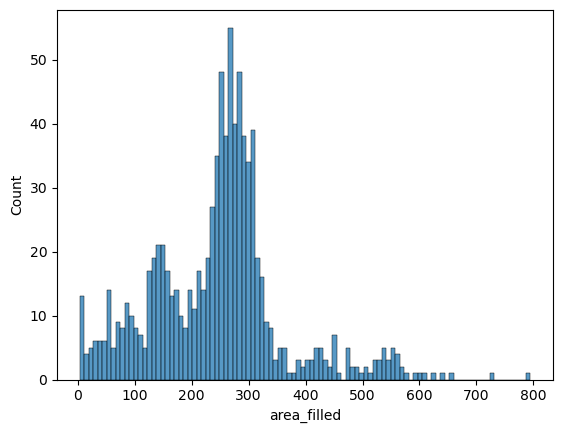

In [9]:
sns.histplot(data=big_df, x='area_filled', bins=100)

Seaborn also offers to turn this into a smoothed distribution estimate (a [*kernel-density estimation*](https://en.wikipedia.org/wiki/Kernel_density_estimation)):

<Axes: xlabel='area_filled', ylabel='Count'>

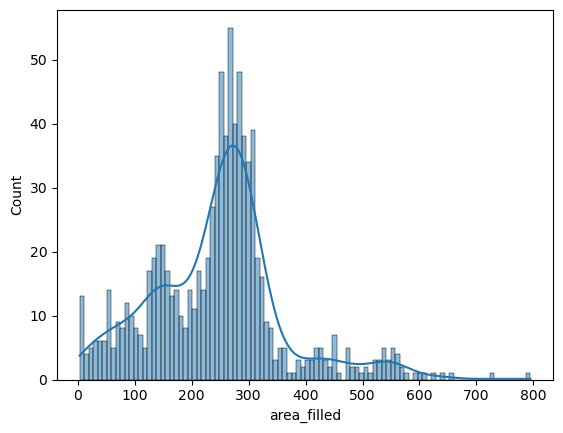

In [10]:
sns.histplot(data=big_df, x='area_filled', bins=100, kde=True)

But where seaborn really shines, is when it comes to comparing different groups in datasets (i.e., categorical variables). If we wanted to compare directly how the nuclei sizes differ between the different conditions (i.e., images), we can simply pass this on to seaborn as the `hue` parameter:

<Axes: xlabel='area_filled', ylabel='Count'>

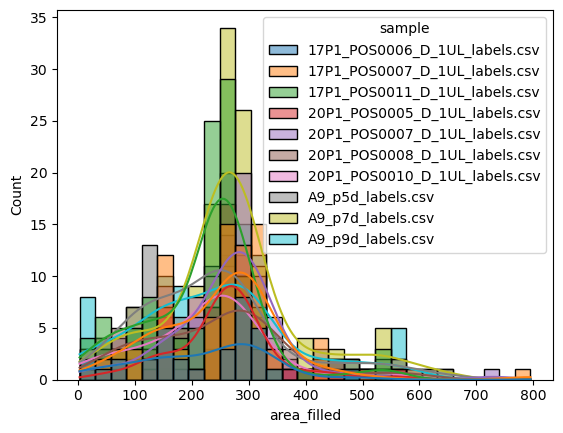

In [11]:
sns.histplot(data=big_df, x='area_filled', hue='sample', kde=True)

Let's replace the `sample` as the category by the `experiment` column:

<Axes: xlabel='area_filled', ylabel='Count'>

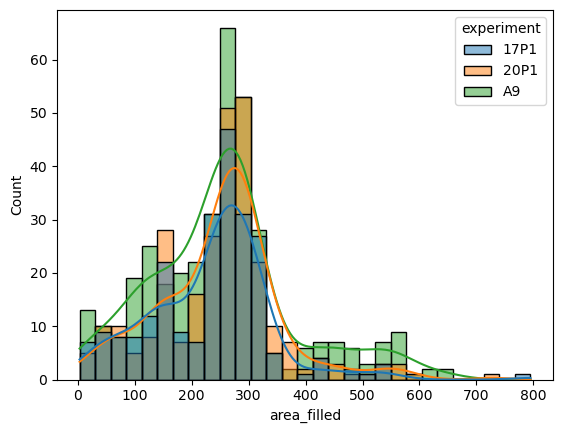

In [12]:
sns.histplot(data=big_df, x='area_filled', hue='experiment', kde=True)

If you only ewant the smoothed histogram estimations rather than the bars, consider using the `kdeplot` function rather than the histogram:

<Axes: xlabel='area_filled', ylabel='Density'>

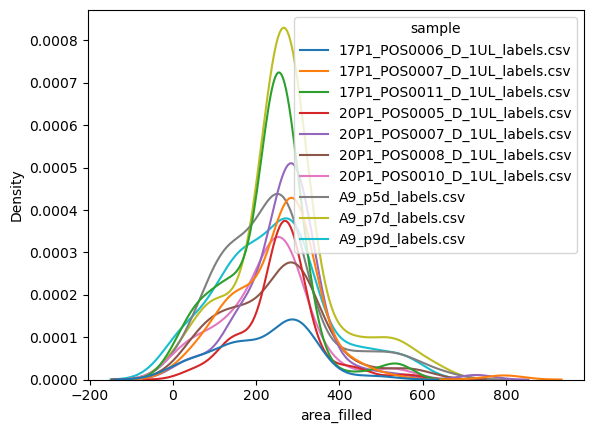

In [15]:
sns.kdeplot(data=big_df, x='area_filled', hue='sample')

## Plotting: Scatters

For a more granular insight into the individual data points, let's take one step back and draw a good old scatterplot and draw two of the above variables against ech other:

<Axes: xlabel='area_filled', ylabel='eccentricity'>

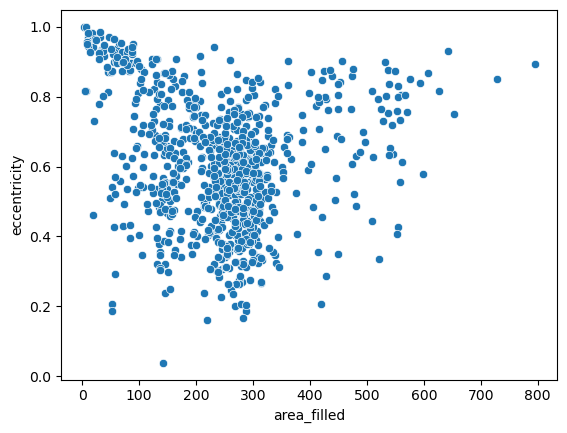

In [16]:
sns.scatterplot(data=big_df, x='area_filled', y='eccentricity')

Again, we can simply pass a categorical variable as `hue` parameter and highlight the different samples. Let's look at a different property:

<Axes: xlabel='intensity_mean', ylabel='eccentricity'>

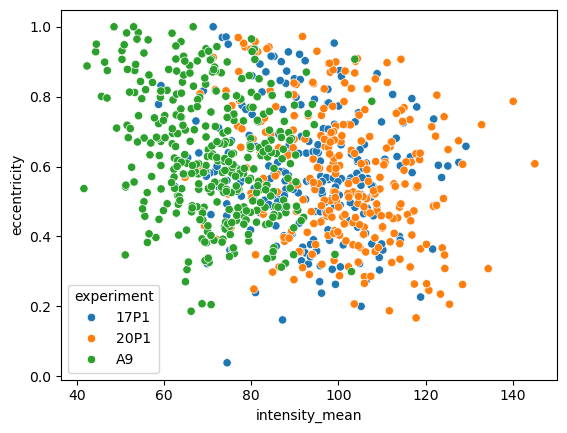

In [19]:
sns.scatterplot(data=big_df, x='intensity_mean', y='eccentricity', hue='experiment')

For a smaller number of features, you may want to plot everything against everything - something that may be terribly hard to do in matplotlib. We drop the `label` column, though - it holds no information about any relevant biology:

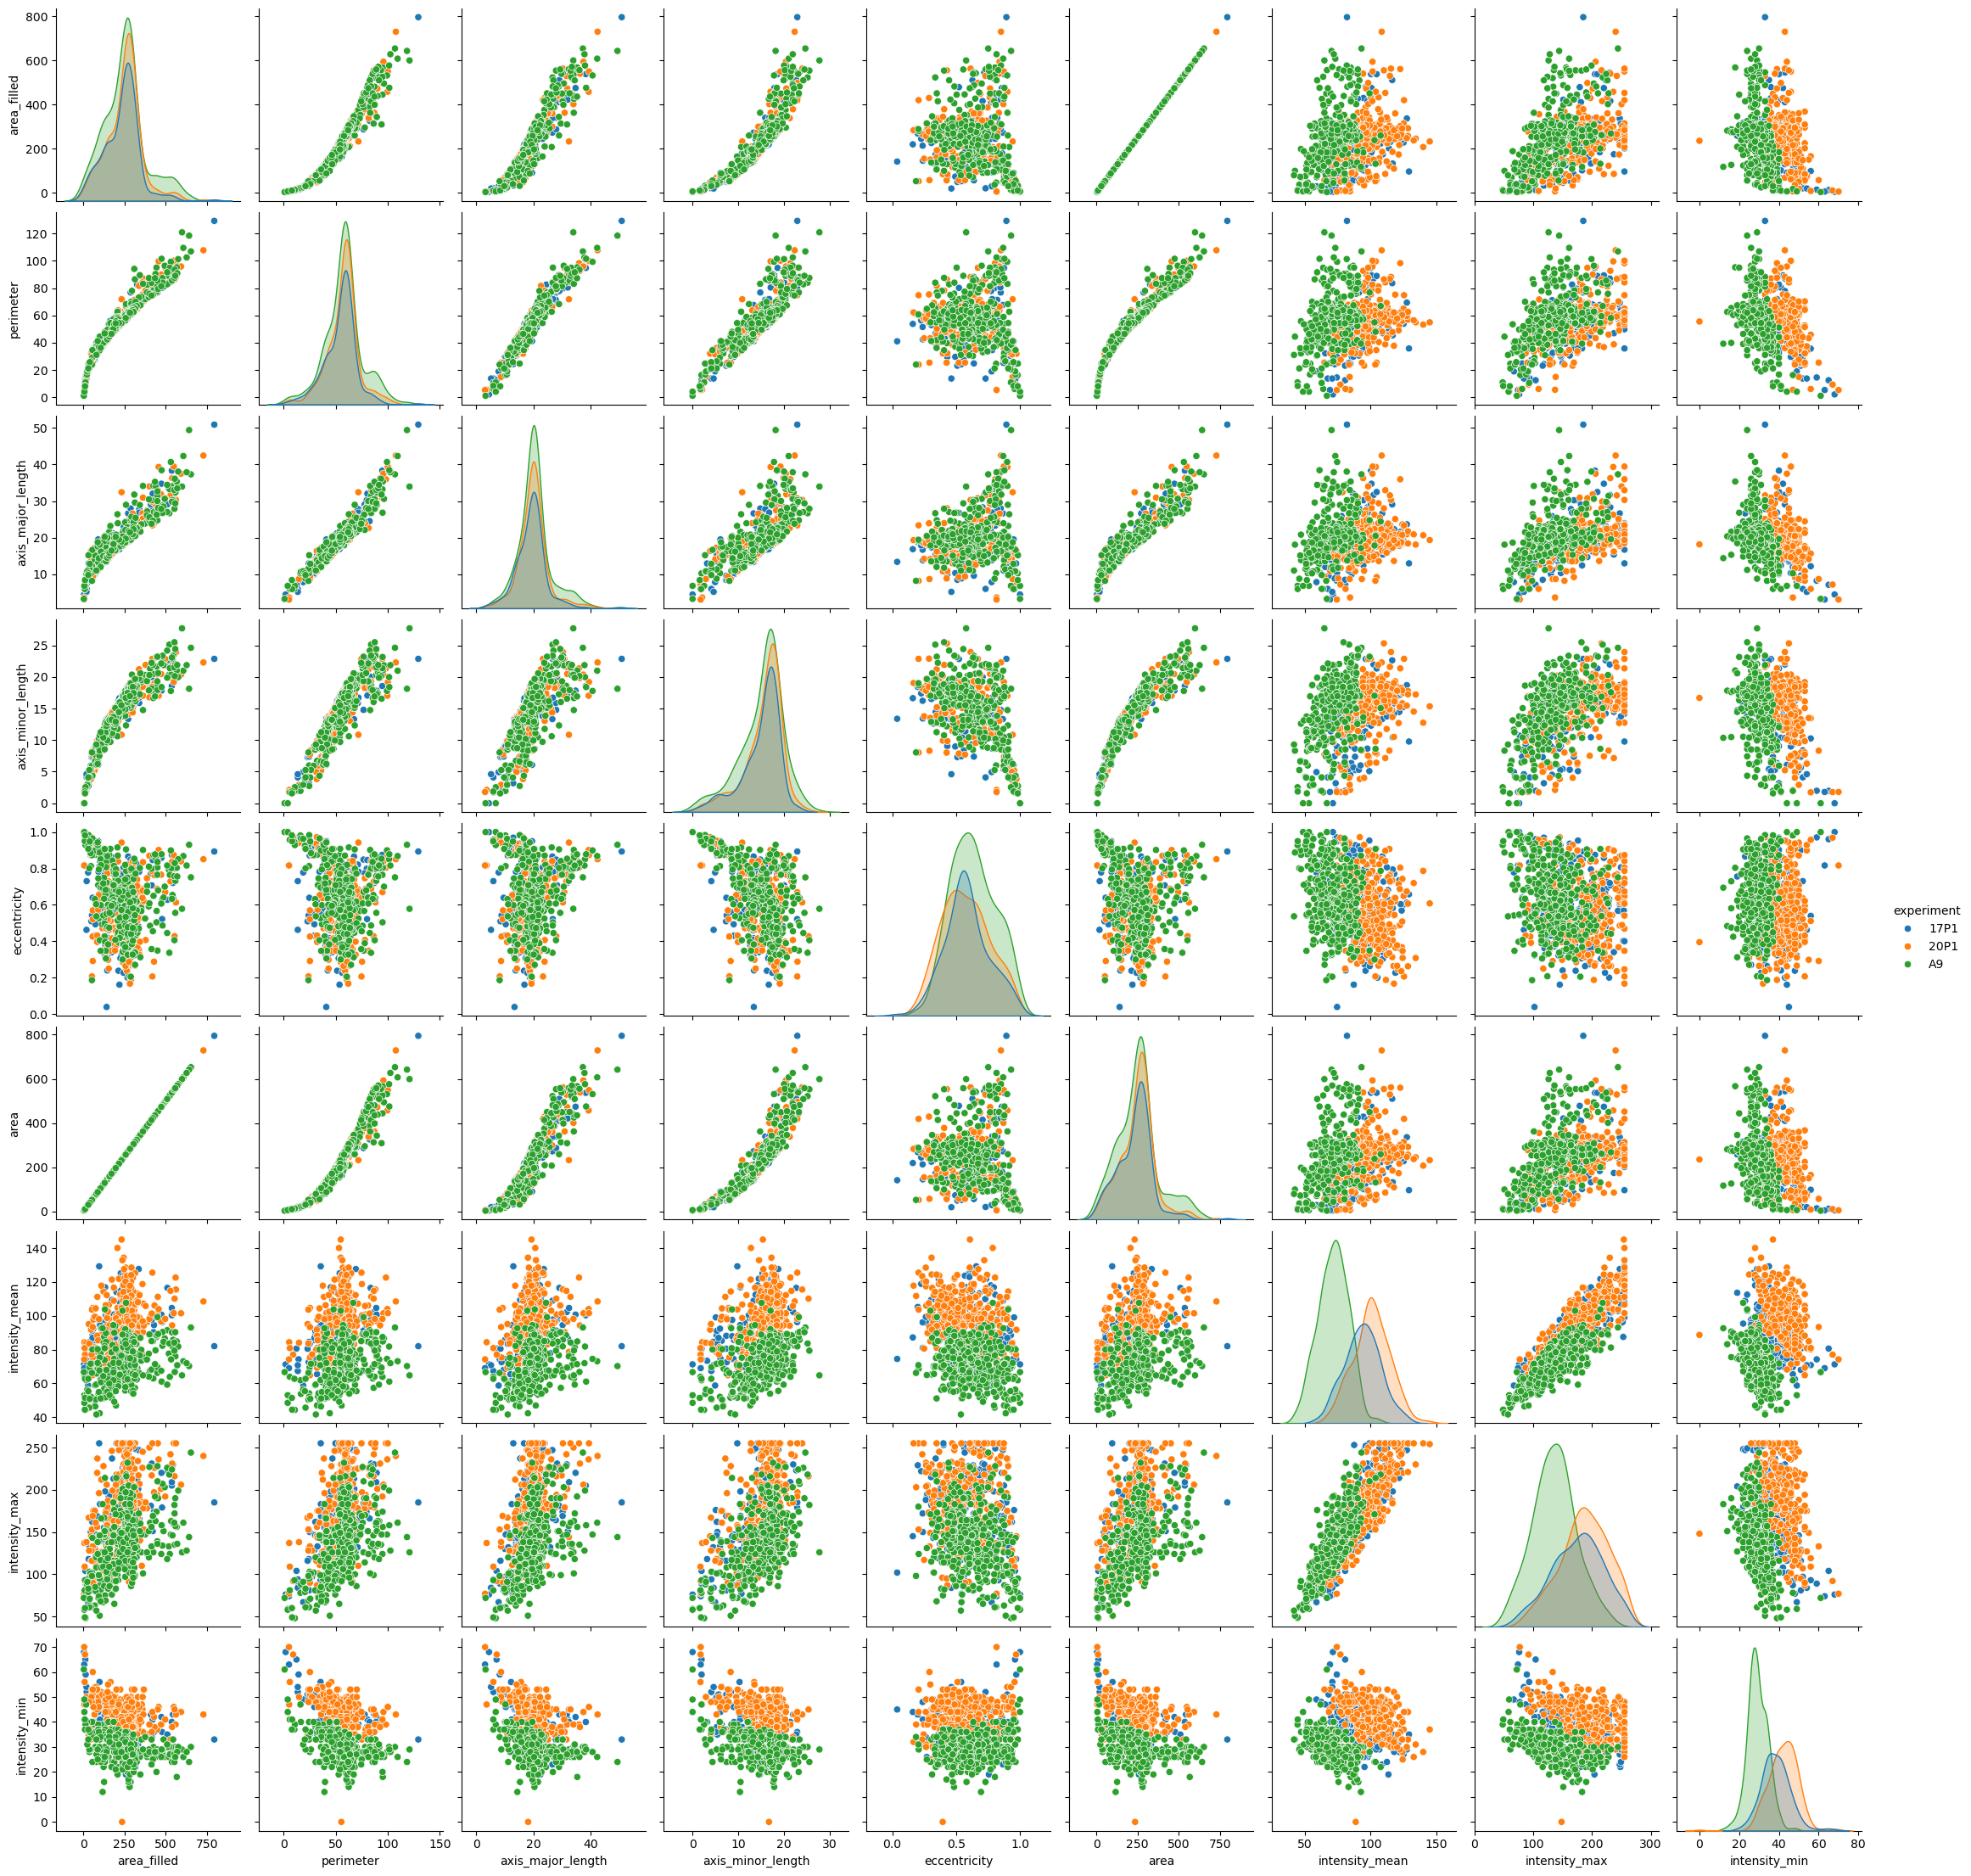

In [20]:
sns.pairplot(data=big_df.drop(columns=['label']), hue='experiment')